In [15]:
import os
path = os.getcwd()
print(path)
print(type(path))
# <class 'str'>

G:\My Drive\Data\Race Eth ACS 2017\Notebooks
<class 'str'>


In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import geojson
import fiona
from pathlib import Path
import json


from pathlib import Path
import json
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import shapely
import shapely.geometry as sg
import folium
import geojson
import fiona
import mapclassify

import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame
import descartes
import pysal

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##### This notebook creates static maps for race and ethnicity

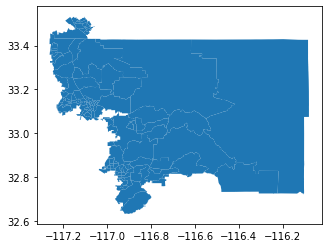

In [2]:
geo = gpd.read_file(r'G:\My Drive\Data\Race Eth ACS 2017\Geo_Files\race_ethn_w_predom_export.geojson')
geo.plot()

In [3]:
geo.head(2)

,GEOID,Total,Estimate White,Estimate Latino,Estimate POC,Estimate Black,Estimate Asian,Estimate Other Race,White,Latino,Black,Asian,Other_Race,POC,Census Tract,County,predominant_race,predominant_race_pct,District_50,whites_below_average,poc_abv_average,white_poc,geometry
0,6065051200,4002,1749,1752,2253,49,332,120,43.703148,43.778111,1.224388,8.295852,2.998501,56.296852,CT 512,Riverside,Latino,43.778111,Demographics,1,1,2,"MULTIPOLYGON (((-117.14876 33.47290, -117.1493..."
1,6065049600,8407,4511,2260,3896,885,388,363,53.657666,26.882360,10.526942,4.615202,4.317830,46.342334,CT 496,Riverside,White,53.657666,Demographics,1,1,2,"POLYGON ((-117.16311 33.52238, -117.16311 33.5..."


In [4]:
total_rows=len(geo.axes[0])
total_cols=len(geo.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 159
Number of Columns: 23


#####  Export this dataframe

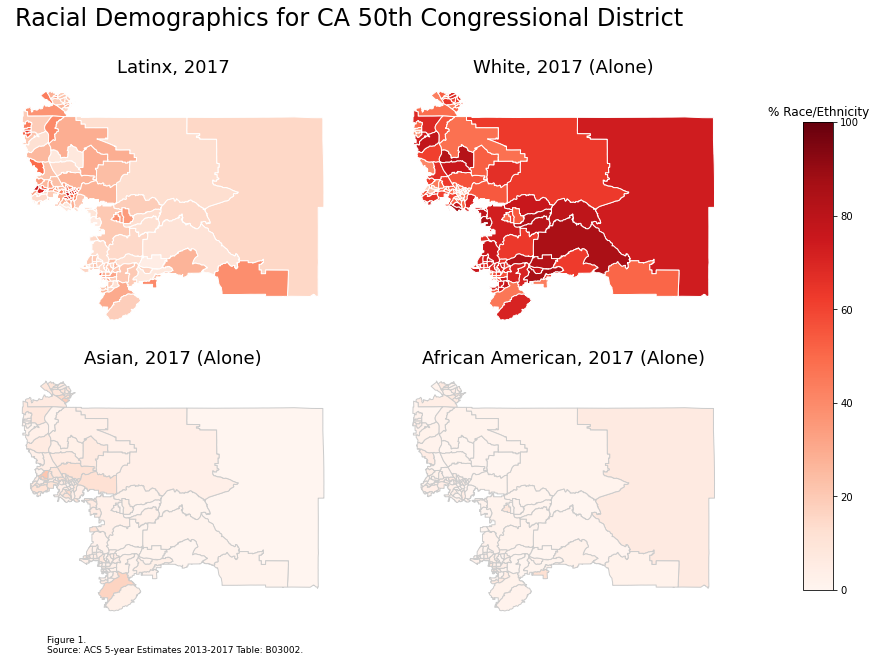

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

variable  = 'Latino'
variable2 = 'White'
variable3 = 'Asian'
variable4 = 'Black'

title='Scores by group and gender'

side_length = 10
fig, axes = plt.subplots(2, 2, figsize=(side_length * 2.1, side_length))
fig.subplots_adjust(hspace=.15, wspace=-.5)

#geo.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# 1st subplot /// Latino
# assume data is in a list data1
ax = geo.plot(column=variable, ax=axes.flat[0], cmap='Reds', edgecolor='white', k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')

ax.set_title('Latinx, 2017', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})


# 2nd subplot  /// White
ax = geo.plot(column=variable2, ax=axes.flat[1], cmap='Reds', edgecolor='white' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')

ax.set_title('White, 2017 (Alone)', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})

# 1st subplot /// Asian
# assume data is in a list data1
ax = geo.plot(column=variable3, ax=axes.flat[2], cmap='Reds', edgecolor='.8' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')

ax.set_title('Asian, 2017 (Alone)', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})

# 2nd subplot  /// Black
ax = geo.plot(column=variable4, ax=axes.flat[3], cmap='Reds', edgecolor='.8' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')

ax.set_title('African American, 2017 (Alone)', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})

# Add single colorbar
cax = fig.add_axes([.8, 0.17, 0.02, 0.65])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_title('% Race/Ethnicity')

fig.suptitle('Racial Demographics for CA 50th Congressional District', fontsize=24, fontweight= 3)

# add a footnote
plt.figtext(.3, .08, r'Figure 1.' + "\n" + 'Source: ACS 5-year Estimates 2013-2017 Table: B03002.', 
                ha='left', va='bottom', fontsize=9)

fig.savefig(r'G:\My Drive\Data\CA Congressional District_Compilation\Graphs\PowerPoint_Four_maps.png', bbox_inches='tight',pad_inches=0.1, dpi=200)

#fig.savefig('myFig.pdf', bbox_inches='tight', pad_inches=0.1)

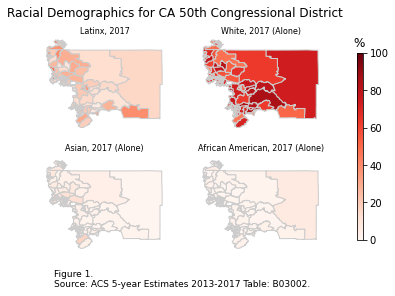

In [14]:
# sized for word processing document

import geopandas as gpd
import matplotlib.pyplot as plt

variable  = 'Latino'
variable2 = 'White'
variable3 = 'Asian'
variable4 = 'Black'

title='Scores by group and gender'

side_length = 4
fig, axes = plt.subplots(2, 2, figsize=(side_length * 2.1, side_length))
fig.subplots_adjust(hspace=.25, wspace=-.5)

#geo.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# 1st subplot /// Latino
# assume data is in a list data1
ax = geo.plot(column=variable, ax=axes.flat[0], cmap='Reds', edgecolor='.8', k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')
# add title
ax.set_title('Latinx, 2017', pad=-25,\
              fontdict={'fontsize': '8',
                        'fontweight' : '3'})

# 2nd subplot  /// White
ax = geo.plot(column=variable2, ax=axes.flat[1], cmap='Reds', edgecolor='.8' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')
# add title
ax.set_title('White, 2017 (Alone)', pad=-25,\
              fontdict={'fontsize': '8',
                        'fontweight' : '3'})

# 1st subplot /// Asian
# assume data is in a list data1
ax = geo.plot(column=variable3, ax=axes.flat[2], cmap='Reds', edgecolor='.8' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')
# add title
ax.set_title('Asian, 2017 (Alone)', \
              fontdict={'fontsize': '8',
                        'fontweight' : '3'})

# 2nd subplot  /// Black
ax = geo.plot(column=variable4, ax=axes.flat[3], cmap='Reds', edgecolor='.8' , k=5, vmin=0, vmax=100)
ax.set_axis_off()
ax.set_aspect('equal')

# add title
ax.set_title('African American, 2017 (Alone)', \
              fontdict={'fontsize': '8',
                        'fontweight' : '3'})

# Add single colorbar
cax = fig.add_axes([.8, 0.17, 0.01, 0.65])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_title('%')

# add MAIN TITLE
fig.suptitle('Racial Demographics for CA 50th Congressional District', fontsize=12, fontweight= 3)
            
# add a footnote        
plt.figtext(.3, 0, r'Figure 1.' + "\n" + 'Source: ACS 5-year Estimates 2013-2017 Table: B03002.', 
                ha='left', va='bottom', fontsize=9)
# EXPORT IMAGE
fig.savefig(r'G:\My Drive\Data\CA Congressional District_Compilation\Graphs\GoogleDoc_four_maps.png', 
            bbox_inches='tight',pad_inches=0.1, dpi=200)